# Codebook  
**Authors:** Lauren Baker  
Documenting existing data files of DaanMatch with information about location, owner, "version", source etc.

In [1]:
import boto3
import numpy as np 
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import statistics

In [2]:
client = boto3.client('s3')
resource = boto3.resource('s3')
my_bucket = resource.Bucket('daanmatchdatafiles')

# DarpanBihar3192020.xlsx

## TOC:
* [About this dataset](#1)
* [Cleaned datasets](#2)
* [What's in this dataset](#3)
* [Codebook](#4)
    * [Missing values](#4.1)
    * [Summary statistics](#4.2)
* [Columns](#5)
    * [Sheet 1](#5.1)
    * [Sheet 2](#5.2)
        * [Url](#5.2.1)
        * [NGO Name](#5.2.2)
        * [Popular Name](#5.2.3)
        * [Year of Establishment](#5.2.4)
        * [GuideStar URL](#5.2.5)
        * [Full Time Staff](#5.2.6)
        * [Full Time Volunteers](#5.2.7)
        * [Brief description](#5.2.8)
        * [Annual Expenditure (Rs in lacs)](#5.2.9)
        * [Year for Annual Expenditure](#5.2.10)
        * [Impact](#5.2.11)
        * [Profile pic](#5.2.12)
        * [Organisation Website](#5.2.13)
        * [Email](#5.2.14)
        * [Telephone/ Mobile number](#5.2.15)
        * [Correspondence  Address](#5.2.16)
        * [Phone](#5.2.17)
        * [Cause(s)](#5.2.18)
        * [Nature of Intervention](#5.2.19)
        * [Beneficairies](#5.2.20)
        * [Focus](#5.2.21)
        * [Area of Operation: State](#5.2.22)
        * [PAN](#5.2.23)
* [Problems with the data](#6)

**About this dataset**  <a class="anchor" id="1"></a>  
Data provided by: Unknown.  
Source: https://daanmatchdatafiles.s3.us-west-1.amazonaws.com/DaanMatch_DataFiles/DarpanBihar3192020.xlsx  
Type: xlsx  
Last Modified: May 29, 2021, 19:56:13 (UTC-07:00)  
Size: 2.0 MB

In [3]:
path = "s3://daanmatchdatafiles/DaanMatch_DataFiles/DarpanBihar3192020.xlsx"
Darpan_Bihar = pd.ExcelFile(path)
print(Darpan_Bihar.sheet_names)

['Sheet1', 'Sheet2']


In [4]:
Darpan_Bihar_1 = Darpan_Bihar.parse('Sheet1')
Darpan_Bihar_1.head()

,Url,Company Name,Date of Incorporation,Class,RoC,Category,Sub Category,Listing Status,Registered Address,State,...,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41
0,INTEGRATED INFOTECH AND CONSULTANCY SERVICES ...,NaN,9.973141e+09,BR/2018/0189401,NaN,itibaheri@gmail.com,NaN,"BIHAR,","Information & Communication Technology,Educati...","BIHAR->Darbhanga, Samastipur, Patna,",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,21ST CENTURY RURAL DEVELOPMENT INSTITUTE.,NaN,9.334105e+09,BR/2018/0221446,NaN,centuryrural@gmail.com,"SOCIAL ACTIVITIES, ENVIRONMENTAL ACTIVITIES AN...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24x7ministry,NaN,9.334296e+09,BR/2017/0167229,NaN,solomanghosh@gmail.com,NaN,"BIHAR,","Children,","BIHAR->Jamui, Patna,",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,360 Research Foundation,https://360rf.in,9.471041e+09,BR/2018/0200583,NaN,360president@gmail.com,To impart free education and culture training ...,"BIHAR,","Science & Technology,Agriculture,Biotechnology...","BIHAR->Pashchim Champaran,",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A CENTER FOR CULTURAL EDUCATIONAL & SOCIAL SUF...,NaN,9.973392e+09,BR/2018/0199254,NaN,accessarvind.kumar@gmail.com,"VOCATIONAL TRAINING PROGRAM WOMEN EMPOWERMENT,...","BIHAR, CHHATTISGARH, DELHI, GOA, JHARKHAND, KA...","Agriculture,Vocational Training,Women's Develo...","BIHAR->Patna, Pashchim Champaran, Purba Champa...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
Darpan_Bihar_2 = Darpan_Bihar.parse('Sheet2')
Darpan_Bihar_2.head()

,Url,NGO Name,Popular Name,Year of Establishment,GuideStar URL,Full Time Staff,Full Time Volunteers,Brief description,Annual Expenditure (Rs in lacs),Year for Annual Expenditure,...,Beneficairies,Focus,Area of Operation: State,PAN,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,https://www.givingtuesdayindia.org/ngo-detail/...,`Sahaj' (An Organisation for Women's Development),Sahaj,2001,https://guidestarindia.org/Summary.aspx?CCReg=...,70,NaN,Sahaj is an organization working for skill dev...,NaN,NaN,...,"Children, Girl Child, Dalits, Artisans, Rural ...",Rural,Gujarat,AACTS0036Q,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.givingtuesdayindia.org/ngo-detail/...,"""DIVYA RASA"" (Centre for Healing, Learning, Re...",Divya Rasa - Temple of Love,2015,https://guidestarindia.org/Summary.aspx?CCReg=...,3,5.0,Divya Rasa is an NGO dedicated to serve autist...,NaN,NaN,...,"Children, Adolescents, Adults, Volunteers",Rural & Urban,Tamil Nadu,AACTD2691L,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.givingtuesdayindia.org/ngo-detail/...,"""Sankalp"" Manav Vikas Sanstha",NaN,1992,https://guidestarindia.org/Summary.aspx?CCReg=...,NaN,NaN,Sankalp Manav Vikas Sanstha is a registered or...,NaN,NaN,...,"Physically Challenged, Children, Girl Child, A...",Rural & Urban,NaN,AAETS2349N,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.givingtuesdayindia.org/ngo-detail/...,"""VISHA"" VOCATIONAL INSTITUTES SOCIAL,HEALTH AN...",VISHA NGO,2012,https://guidestarindia.org/Summary.aspx?CCReg=...,3,23.0,"Vocational Institutes Social,Health and Agricu...",NaN,NaN,...,"Children, Girl Child, Adolescents, Dalits, Adu...",Rural & Urban,Odisha,AACTV0963D,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.givingtuesdayindia.org/ngo-detail/...,17000 ft Foundation,17000 ft,2012,https://guidestarindia.org/Summary.aspx?CCReg=...,29,0.0,17000 ft Foundation is a Not for profit setup ...,NaN,FY 2018-19,...,"Adolescents, Children, Girl Child, Rural Poor,...",Rural,Jammu and Kashmir,AAACZ5957C,NaN,NaN,NaN,NaN,NaN,NaN


**Cleaned datasets** <a class="anchor" id="2"></a>

In [6]:
Darpan_Bihar_2 = Darpan_Bihar_2.iloc[:, :23]
Darpan_Bihar_2.head()

,Url,NGO Name,Popular Name,Year of Establishment,GuideStar URL,Full Time Staff,Full Time Volunteers,Brief description,Annual Expenditure (Rs in lacs),Year for Annual Expenditure,...,Email,Telephone/ Mobile number,Correspondence Address,Phone,Cause(s),Nature of Intervention,Beneficairies,Focus,Area of Operation: State,PAN
0,https://www.givingtuesdayindia.org/ngo-detail/...,`Sahaj' (An Organisation for Women's Development),Sahaj,2001,https://guidestarindia.org/Summary.aspx?CCReg=...,70,NaN,Sahaj is an organization working for skill dev...,NaN,NaN,...,admnsahaj@outlook.com,NaN,"Desai Automobile Compound,\nGarbada Road, Pada...","91-2673-245215, 91-2673-245215","Community Development, Education, Healthcare, ...",Direct service,"Children, Girl Child, Dalits, Artisans, Rural ...",Rural,Gujarat,AACTS0036Q
1,https://www.givingtuesdayindia.org/ngo-detail/...,"""DIVYA RASA"" (Centre for Healing, Learning, Re...",Divya Rasa - Temple of Love,2015,https://guidestarindia.org/Summary.aspx?CCReg=...,3,5.0,Divya Rasa is an NGO dedicated to serve autist...,NaN,NaN,...,divyarasa555@divyarasa.org,91-9176300657,"Divya Rasa - Temple of Love, Su Kilnachipattu,...",NaN,Education,Direct service,"Children, Adolescents, Adults, Volunteers",Rural & Urban,Tamil Nadu,AACTD2691L
2,https://www.givingtuesdayindia.org/ngo-detail/...,"""Sankalp"" Manav Vikas Sanstha",NaN,1992,https://guidestarindia.org/Summary.aspx?CCReg=...,NaN,NaN,Sankalp Manav Vikas Sanstha is a registered or...,NaN,NaN,...,sudhakarsankalp@gmail.com,91-9096696633,"Sudhakar Kshirsagar,Gautam Nagar Pathari,\nPat...",NaN,"Children, Community Development, Education, He...",Advocacy & Campaigning,"Physically Challenged, Children, Girl Child, A...",Rural & Urban,NaN,AAETS2349N
3,https://www.givingtuesdayindia.org/ngo-detail/...,"""VISHA"" VOCATIONAL INSTITUTES SOCIAL,HEALTH AN...",VISHA NGO,2012,https://guidestarindia.org/Summary.aspx?CCReg=...,3,23.0,"Vocational Institutes Social,Health and Agricu...",NaN,NaN,...,kptvisha@gmail.com,91-9438022310,"Goutam Nagar Last Lane,,\nkoraput Koraput, ...",NaN,"Children, Education, Healthcare, Livelihoods, ...","Support, Network, Direct service","Children, Girl Child, Adolescents, Dalits, Adu...",Rural & Urban,Odisha,AACTV0963D
4,https://www.givingtuesdayindia.org/ngo-detail/...,17000 ft Foundation,17000 ft,2012,https://guidestarindia.org/Summary.aspx?CCReg=...,29,0.0,17000 ft Foundation is a Not for profit setup ...,NaN,FY 2018-19,...,reach.us@17000ft.org,91-9871100334,NaN,NaN,Education,"Direct service, Support","Adolescents, Children, Girl Child, Rural Poor,...",Rural,Jammu and Kashmir,AAACZ5957C


**What's in this dataset?** <a class="anchor" id="2"></a>

In [77]:
print('Sheet 1:')
print("Shape:", Darpan_Bihar_1.shape)
print("Rows:", Darpan_Bihar_1.shape[0])
print("Columns:", Darpan_Bihar_1.shape[1])
print("Each row is an NGO.")

print('\n')
print('Sheet 2:')
print("Shape:", Darpan_Bihar_2.shape)
print("Rows:", Darpan_Bihar_2.shape[0])
print("Columns:", Darpan_Bihar_2.shape[1])
print("Each row is an NGO.")

Sheet 1:
Shape: (2881, 42)
Rows: 2881
Columns: 42
Each row is an NGO.


Sheet 2:
Shape: (926, 23)
Rows: 926
Columns: 23
Each row is an NGO.


**Codebook** <a class="anchor" id="4"></a>

In [8]:
Darpan_Bihar_2.replace("13 Project staff", 13, inplace = True)
Darpan_Bihar_2['Full Time Staff'] = Darpan_Bihar_2['Full Time Staff'].astype(float)

In [9]:
print("Sheet 2 Codebook:")
Darpan_Bihar_2_columns = [column for column in Darpan_Bihar_2.columns]
Darpan_Bihar_2_description = ["Url to the NGO on the website GivingTuesdayIndia.", 
                              "Full name of NGO.", 
                              "Shortened / commonly used NGO name.", 
                              "Year NGO was started.", 
                              "Page for NGO on the website GuideStar.", 
                              "Number of full-time employees at the NGO.", 
                              "Number of full-time volunteers at the NGO.", 
                              "Description of what the NGO is.", 
                              "How much money is spent annually (In Rs in lacs).", 
                              "The year that the amount in the previous column was spent.", 
                              "What the NGO has been able to accomplish so far.", 
                              "Link to a profile photo of the NGO.", 
                              "NGO website.", 
                              "Email address.", 
                              "Telephone or mobile phone number.", 
                              "NGO office address.", 
                              "Office phone number.", 
                              "Causes the NGO supports.", 
                              "How the NGO performs acts of service.", 
                              "Groups that are benefited from the NGO.", 
                              "Focus of the NGO (Rural, Urban, or Rural & Urban).", 
                              "States or Districts that the NGO performs service.", 
                              "Permanent Account Number. 10-digit alphanumeric number that is assigned to each NGO."]
Darpan_Bihar_2_dtypes = [dtype for dtype in Darpan_Bihar_2.dtypes]

data_2 = {"Column Name": Darpan_Bihar_2_columns, "Description": Darpan_Bihar_2_description, "Type": Darpan_Bihar_2_dtypes}
Darpan_Bihar_2_codebook = pd.DataFrame(data_2)
Darpan_Bihar_2_codebook.style.set_properties(subset=['Description'], **{'width': '600px'})

Sheet 2 Codebook:


,Column Name,Description,Type
0,Url,Url to the NGO on the website GivingTuesdayIndia.,object
1,NGO Name,Full name of NGO.,object
2,Popular Name,Shortened / commonly used NGO name.,object
3,Year of Establishment,Year NGO was started.,int64
4,GuideStar URL,Page for NGO on the website GuideStar.,object
5,Full Time Staff,Number of full-time employees at the NGO.,float64
6,Full Time Volunteers,Number of full-time volunteers at the NGO.,float64
7,Brief description,Description of what the NGO is.,object
8,Annual Expenditure (Rs in lacs),How much money is spent annually (In Rs in lacs).,object
9,Year for Annual Expenditure,The year that the amount in the previous column was spent.,object


**Missing values** <a class="anchor" id="4.1"></a>

In [76]:
Darpan_Bihar_1.isnull().sum()

Url                                      0
Company Name                          2338
Date of Incorporation                    1
Class                                    0
RoC                                   2274
Category                                 0
Sub Category                           728
Listing Status                         510
Registered Address                     449
State                                  510
Email ID                                 0
Paid-up Capital (in INR Cr.)          2144
Authorized Capital (in INR Cr.)          0
FY 2014-15 Turnover (in INR Cr.)         0
FY 2014-15 Networth (in INR Cr.)         0
FY 2014-15 Net Profit (in INR Cr.)       0
FY 2015-16 Turnover (in INR Cr.)        92
FY 2015-16 Networth (in INR Cr.)         7
FY 2015-16 Net Profit (in INR Cr.)       0
FY 2016-17 Turnover (in INR Cr.)         0
FY 2016-17 Networth (in INR Cr.)      2881
FY 2016-17 Net Profit (in INR Cr.)    1599
Unnamed: 22                           1599
Unnamed: 23

In [10]:
Darpan_Bihar_2.isnull().sum()

Url                                  0
NGO Name                             0
Popular Name                       288
Year of Establishment                0
GuideStar URL                        1
Full Time Staff                    153
Full Time Volunteers               262
Brief description                   20
Annual Expenditure (Rs in lacs)    762
Year for Annual Expenditure        748
Impact                             460
Profile pic                        740
Organisation Website               131
Email                                1
Telephone/ Mobile number           253
Correspondence  Address             72
Phone                              807
Cause(s)                            27
Nature of Intervention              14
Beneficairies                       26
Focus                               33
Area of Operation: State           150
PAN                                  0
dtype: int64

**Summary statistics** <a class="anchor" id="4.2"></a>

In [11]:
Darpan_Bihar_2.describe()

,Year of Establishment,Full Time Staff,Full Time Volunteers
count,926.000000,773.000000,664.000000
mean,2464.767819,75.618370,159.347892
std,14121.819071,261.424938,1289.265298
min,1922.000000,0.000000,0.000000
25%,1994.000000,7.000000,3.000000
50%,2002.000000,18.000000,8.000000
75%,2010.000000,50.000000,25.000000
max,431731.000000,5132.000000,24450.000000


## Columns
<a class="anchor" id="5"></a>

### Sheet 2
<a class="anchor" id="5.2"></a>
Sheet 2 contains information about several NGOs. 

### Url
<a class="anchor" id="5.2.1"></a>
Url to the NGO on the website GivingTuesdayIndia.

In [12]:
column = Darpan_Bihar_2["Url"]
column

0      https://www.givingtuesdayindia.org/ngo-detail/...
1      https://www.givingtuesdayindia.org/ngo-detail/...
2      https://www.givingtuesdayindia.org/ngo-detail/...
3      https://www.givingtuesdayindia.org/ngo-detail/...
4      https://www.givingtuesdayindia.org/ngo-detail/...
                             ...                        
921    https://www.givingtuesdayindia.org/ngo-detail/...
922    https://www.givingtuesdayindia.org/ngo-detail/...
923    https://www.givingtuesdayindia.org/ngo-detail/...
924    https://www.givingtuesdayindia.org/ngo-detail/...
925    https://www.givingtuesdayindia.org/ngo-detail/...
Name: Url, Length: 926, dtype: object

In [13]:
# Check number of unique values
print("No. of unique values:", len(column.unique()))

# Check for duplicates
counter = dict(Counter(column))
duplicates = { key:value for key, value in counter.items() if value > 1}
print("Duplicates:", duplicates)
if len(duplicates) > 0:
    print("No. of duplicates:", len(duplicates))

# Check for null values
print("Null:", sum(column.isnull()))

No. of unique values: 926
Duplicates: {}
Null: 0


### NGO Name
<a class="anchor" id="5.2.2"></a>
Full name of the NGO.

In [14]:
column = Darpan_Bihar_2["NGO Name"]
column

0      `Sahaj' (An Organisation for Women's Development)
1      "DIVYA RASA" (Centre for Healing, Learning, Re...
2                          "Sankalp" Manav Vikas Sanstha
3      "VISHA" VOCATIONAL INSTITUTES SOCIAL,HEALTH AN...
4                                    17000 ft Foundation
                             ...                        
921                                 Christel House India
922                                    MAKE A DIFFERENCE
923                      Makkal Vilipunarvu Kalvi Sangam
924    The Community Outreach Programme (Bombay Annua...
925                UMA EDUCATIONAL AND TECHNICAL SOCIETY
Name: NGO Name, Length: 926, dtype: object

In [15]:
# Check number of unique values
print("No. of unique values:", len(column.unique()))

# Check for duplicates
counter = dict(Counter(column))
duplicates = { key:value for key, value in counter.items() if value > 1}
print("Duplicates:", duplicates)
if len(duplicates) > 0:
    print("No. of duplicates:", len(duplicates))

# Check for null values
print("Null:", sum(column.isnull()))

No. of unique values: 925
Duplicates: {'Association for Rural Development': 2}
No. of duplicates: 1
Null: 0


### Popular Name
<a class="anchor" id="5.2.3"></a>
Shortened / commonly used NGO name.

In [16]:
column = Darpan_Bihar_2["Popular Name"]
column

0                                                  Sahaj
1                            Divya Rasa - Temple of Love
2                                                    NaN
3                                              VISHA NGO
4                                               17000 ft
                             ...                        
921                                 Christel House India
922                                                  MAD
923               Makkal Vilipunarvu Kalvi Sangam (MVKS)
924                                           CORP India
925    Uma Educational & Technical Society, Kakinada(...
Name: Popular Name, Length: 926, dtype: object

In [17]:
# Check number of unique values
print("No. of unique values:", len(column.unique()))

# Check for duplicates
counter = dict(Counter(column))
duplicates = { key:value for key, value in counter.items() if value > 1}
print("Duplicates:", duplicates)
if len(duplicates) > 0:
    print("No. of duplicates:", len(duplicates))

# Check for null values
print("Null:", sum(column.isnull()))

No. of unique values: 628
Duplicates: {nan: 288, 'ACT': 2, 'CARD': 2, 'DSS': 3, 'GRAVIS': 2, 'SPANDAN': 2, 'READ': 2, 'SJKS': 2, 'TCF': 2, 'SRLC': 3}
No. of duplicates: 10
Null: 288


In [18]:
Darpan_Bihar_2[Darpan_Bihar_2['Popular Name'] == 'ACT']

,Url,NGO Name,Popular Name,Year of Establishment,GuideStar URL,Full Time Staff,Full Time Volunteers,Brief description,Annual Expenditure (Rs in lacs),Year for Annual Expenditure,...,Email,Telephone/ Mobile number,Correspondence Address,Phone,Cause(s),Nature of Intervention,Beneficairies,Focus,Area of Operation: State,PAN
73,https://www.givingtuesdayindia.org/ngo-detail/...,ASSOCIATION FOR COMMUNITY TRAINING,ACT,1983,https://guidestarindia.org/Summary.aspx?CCReg=...,10.0,65.0,"we have improving the social, educational and ...",NaN,NaN,...,act_mugaiyur@rediffmail.com,NaN,"Mugaiyur,\nMugaiyur Viluppuram, \nThirukovi...",NaN,"Children, Community Development, Education, Li...",Direct service,"Physically Challenged, Construction Workers, C...",Rural & Urban,Tamil Nadu,AAAAA0862H
849,https://www.givingtuesdayindia.org/ngo-detail/...,Ashwini Charitable Trust,ACT,2000,https://guidestarindia.org/Summary.aspx?CCReg=...,7.0,416.0,Ashwini Charitable Trust fondly referred to as...,78.05,FY 2017-18,...,act.trust@gmail.com,91-9243198157,"No 3, St. John'S Road Cross,\nNear Ulsoor Lake...",NaN,Education,Direct service,"Urban poor, Children, Girl Child, Slum Dweller...",Urban,Karnataka,AAATA8420E


Duplicates in ```Popluar Name``` do not mean duplicates in NGOs.

### Year of Establishment
<a class="anchor" id="5.2.4"></a>
Year NGO was started.

In [19]:
column = Darpan_Bihar_2["Year of Establishment"]
column

0      2001
1      2015
2      1992
3      2012
4      2012
       ... 
921    2000
922    2006
923    1996
924    1977
925    1988
Name: Year of Establishment, Length: 926, dtype: int64

In [20]:
# Number of null values
print("Null:", sum(column.isnull()))

# Drop null values
cleaned = column.dropna()

#Drop invalid values
dates = cleaned.astype(str)
invalid = len(dates[dates.astype(int) > 3000])
dates = dates[dates.astype(int) < 3000]

# Range
print("Min:", min(dates))
print("Max:", max(dates))
print("Invalid values:", invalid)

Null: 0
Min: 1922
Max: 2018
Invalid values: 1


In [21]:
# Check number of unique values
print("No. of unique values:", len(column.unique()))

# Check for duplicates
counter = dict(Counter(column))
duplicates = { key:value for key, value in counter.items() if value > 1}
print("Duplicates:", duplicates)
if len(duplicates) > 0:
    print("No. of duplicates:", len(duplicates))

No. of unique values: 63
Duplicates: {2001: 44, 2015: 30, 1992: 26, 2012: 30, 2000: 33, 1999: 18, 2005: 46, 2006: 38, 2002: 40, 2009: 25, 2008: 27, 2007: 29, 2014: 39, 1993: 26, 1991: 17, 2013: 35, 1979: 4, 1969: 4, 2004: 27, 1989: 12, 1997: 19, 1978: 2, 2017: 13, 1995: 33, 1990: 11, 1977: 4, 2016: 15, 2010: 35, 1972: 3, 1988: 18, 1998: 26, 1996: 18, 1980: 7, 2011: 27, 1983: 6, 1985: 5, 1994: 30, 1987: 8, 2018: 9, 1976: 2, 1986: 5, 2003: 33, 1981: 6, 1982: 8, 1963: 2, 1975: 3, 1984: 8, 1974: 2, 1956: 2, 1953: 3}
No. of duplicates: 50


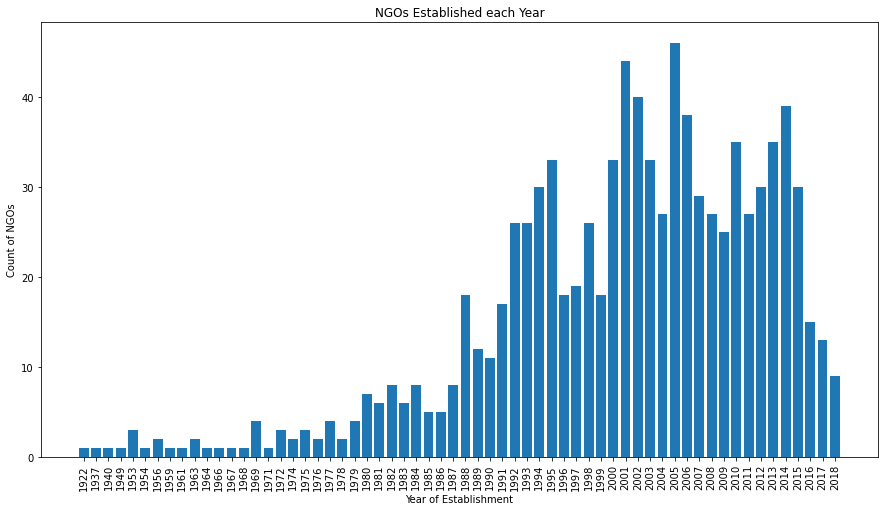

In [22]:
#Plot number of NGOs established each year
counter = dict(Counter(dates))
count = { key:[value] for key, value in counter.items()}
table = pd.DataFrame.from_dict(count)
table = table.melt(var_name="Date", value_name="Count")

plt.figure(figsize = (15, 8))
plt.bar(table.sort_values('Date')["Date"], table.sort_values('Date')["Count"])
plt.title("NGOs Established each Year")
plt.ylabel("Count of NGOs")
plt.xlabel("Year of Establishment")
plt.xticks(rotation = 90);

### GuideStar URL
<a class="anchor" id="5.2.5"></a>
Page for NGO on the website GuideStar.

In [23]:
column = Darpan_Bihar_2["GuideStar URL"]
column

0      https://guidestarindia.org/Summary.aspx?CCReg=...
1      https://guidestarindia.org/Summary.aspx?CCReg=...
2      https://guidestarindia.org/Summary.aspx?CCReg=...
3      https://guidestarindia.org/Summary.aspx?CCReg=...
4      https://guidestarindia.org/Summary.aspx?CCReg=...
                             ...                        
921    https://guidestarindia.org/Summary.aspx?CCReg=...
922    https://guidestarindia.org/Summary.aspx?CCReg=...
923    https://guidestarindia.org/Summary.aspx?CCReg=...
924    https://guidestarindia.org/Summary.aspx?CCReg=...
925    https://guidestarindia.org/Summary.aspx?CCReg=...
Name: GuideStar URL, Length: 926, dtype: object

In [24]:
# Check number of unique values
print("No. of unique values:", len(column.unique()))

# Check for duplicates
counter = dict(Counter(column))
duplicates = { key:value for key, value in counter.items() if value > 1}
print("Duplicates:", duplicates)
if len(duplicates) > 0:
    print("No. of duplicates:", len(duplicates))

# Check for null values
print("Null:", sum(column.isnull()))

No. of unique values: 926
Duplicates: {}
Null: 1


### Full Time Staff
<a class="anchor" id="5.2.6"></a>
Number of full-time employees at the NGO.

In [25]:
column = Darpan_Bihar_2["Full Time Staff"]
column

0       70.0
1        3.0
2        NaN
3        3.0
4       29.0
       ...  
921    117.0
922     33.0
923     10.0
924     88.0
925    128.0
Name: Full Time Staff, Length: 926, dtype: float64

In [26]:
# Number of null values
print("Null Values:", sum(column.isnull()))

# Drop null values
cleaned = column.dropna()

#Drop invalid values
counts = cleaned.astype(int)

# Range
print("Min:", min(counts))
print("Max:", max(counts))

Null Values: 153
Min: 0
Max: 5132


In [27]:
#Statistics
counts.describe()

count     773.000000
mean       75.618370
std       261.424938
min         0.000000
25%         7.000000
50%        18.000000
75%        50.000000
max      5132.000000
Name: Full Time Staff, dtype: float64

In [28]:
# Check number of unique values
print("No. of unique values:", len(column.unique()))

# Check for duplicates
counter = dict(Counter(column))
duplicates = { key:value for key, value in counter.items() if value > 1}
print("Duplicates:", duplicates)
if len(duplicates) > 0:
    print("No. of duplicates:", len(duplicates))

No. of unique values: 170
Duplicates: {70.0: 5, 3.0: 22, 29.0: 3, 10.0: 34, 53.0: 4, 15.0: 29, 30.0: 14, 4.0: 35, 18.0: 10, 1.0: 21, 6.0: 19, 21.0: 10, 20.0: 23, 38.0: 4, 75.0: 3, 65.0: 4, 14.0: 14, 7.0: 22, 210.0: 2, 35.0: 13, 25.0: 23, 36.0: 6, 5.0: 35, 8.0: 23, 34.0: 3, 13.0: 16, 55.0: 5, 12.0: 19, 27.0: 8, 23.0: 7, 100.0: 6, 98.0: 2, 45.0: 4, 43.0: 4, 90.0: 4, 16.0: 8, 163.0: 2, 28.0: 5, 11.0: 17, 150.0: 3, 2.0: 25, 50.0: 5, 17.0: 8, 9.0: 17, 117.0: 4, 0.0: 15, 40.0: 7, 82.0: 4, 32.0: 6, 39.0: 5, 47.0: 2, 63.0: 3, 1140.0: 2, 46.0: 2, 24.0: 5, 230.0: 2, 54.0: 4, 60.0: 6, 66.0: 2, 86.0: 2, 62.0: 2, 41.0: 2, 94.0: 4, 19.0: 6, 22.0: 6, 67.0: 2, 125.0: 2, 33.0: 3, 52.0: 4, 42.0: 4, 120.0: 3, 31.0: 5, 49.0: 2, 145.0: 2, 123.0: 2, 80.0: 3, 200.0: 3, 300.0: 3, 128.0: 2, 44.0: 2, 51.0: 2, 110.0: 2, 26.0: 2, 162.0: 2, 130.0: 2}
No. of duplicates: 85


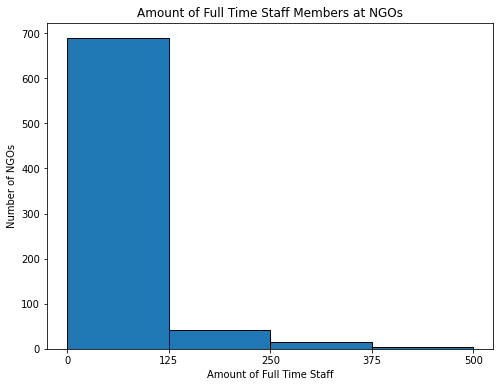

In [29]:
bins= np.linspace(0, 500, 5)
plt.figure(figsize = (8, 6))
plt.hist(cleaned, bins=bins, edgecolor="k")
plt.title('Amount of Full Time Staff Members at NGOs')
plt.xlabel('Amount of Full Time Staff')
plt.ylabel('Number of NGOs')
plt.xticks(bins);

plt.show()

### Full Time Volunteers
<a class="anchor" id="5.2.7"></a>
Number of full-time volunteers at the NGO.

In [30]:
column = Darpan_Bihar_2["Full Time Volunteers"]
column

0        NaN
1        5.0
2        NaN
3       23.0
4        0.0
       ...  
921      0.0
922    500.0
923      4.0
924      7.0
925      0.0
Name: Full Time Volunteers, Length: 926, dtype: float64

In [31]:
# Number of null values
print("Null Values:", sum(column.isnull()))

# Drop null values
cleaned = column.dropna()

#Drop invalid values
counts = cleaned.astype(int)

# Range
print("Min:", min(counts))
print("Max:", max(counts))

Null Values: 262
Min: 0
Max: 24450


In [32]:
#Statistics
counts.describe()

count      664.000000
mean       159.347892
std       1289.265298
min          0.000000
25%          3.000000
50%          8.000000
75%         25.000000
max      24450.000000
Name: Full Time Volunteers, dtype: float64

In [33]:
# Check number of unique values
print("No. of unique values:", len(column.unique()))

# Check for duplicates
counter = dict(Counter(column))
duplicates = { key:value for key, value in counter.items() if value > 1}
print("Duplicates:", duplicates)
if len(duplicates) > 0:
    print("No. of duplicates:", len(duplicates))

No. of unique values: 100
Duplicates: {5.0: 63, 23.0: 2, 0.0: 80, 100.0: 10, 3.0: 34, 10.0: 43, 4.0: 32, 14.0: 3, 145.0: 2, 160.0: 2, 38.0: 2, 43.0: 2, 8.0: 19, 15.0: 21, 24.0: 4, 32.0: 4, 12.0: 14, 2.0: 45, 20.0: 28, 18.0: 6, 26.0: 2, 6.0: 22, 1.0: 31, 65.0: 3, 9.0: 4, 7.0: 17, 40.0: 10, 30.0: 13, 21.0: 4, 41.0: 3, 200.0: 3, 45.0: 3, 125.0: 4, 11.0: 3, 150.0: 5, 56.0: 2, 50.0: 11, 28.0: 2, 17.0: 3, 300.0: 2, 54.0: 2, 10000.0: 2, 49.0: 2, 80.0: 3, 34.0: 3, 25.0: 16, 13.0: 4, 95.0: 2, 115.0: 2, 27.0: 4, 22.0: 2, 35.0: 4, 33.0: 2, 250.0: 2, 70.0: 2, 500.0: 4, 37.0: 2, 86.0: 2}
No. of duplicates: 58


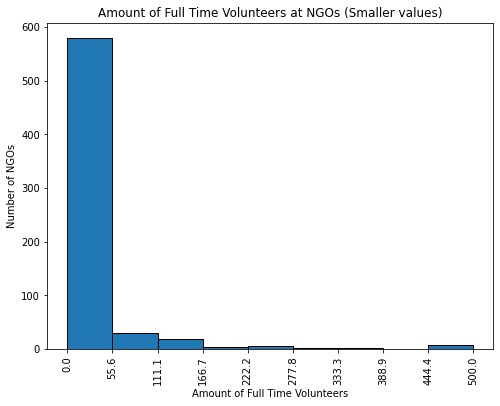

In [34]:
#Smaller values
bins= np.linspace(0, 500, 10)
plt.figure(figsize = (8, 6))
plt.hist(cleaned, bins=bins, edgecolor="k")
plt.title('Amount of Full Time Volunteers at NGOs (Smaller values)')
plt.xlabel('Amount of Full Time Volunteers')
plt.ylabel('Number of NGOs')
plt.xticks(bins, rotation = 90);

plt.show()

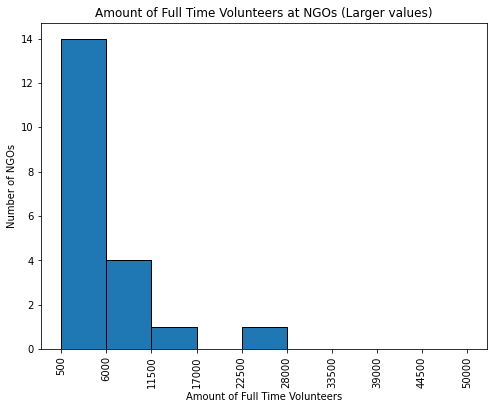

In [35]:
#Larger amounts of volunteers
bins= np.linspace(500, 50000, 10)
plt.figure(figsize = (8, 6))
plt.hist(cleaned, bins=bins, edgecolor="k")
plt.title('Amount of Full Time Volunteers at NGOs (Larger values)')
plt.xlabel('Amount of Full Time Volunteers')
plt.ylabel('Number of NGOs')
plt.xticks(bins, rotation = 90);

plt.show()

### Brief description
<a class="anchor" id="5.2.8"></a>
Description of what the NGO is.

In [36]:
column = Darpan_Bihar_2["Brief description"]
column

0      Sahaj is an organization working for skill dev...
1      Divya Rasa is an NGO dedicated to serve autist...
2      Sankalp Manav Vikas Sanstha is a registered or...
3      Vocational Institutes Social,Health and Agricu...
4      17000 ft Foundation is a Not for profit setup ...
                             ...                        
921    Christel House (CH) strives to transform the l...
922    Make A Difference (MAD) is a youth driven, non...
923    MVKS has formed 184 SHGs with strength of 2805...
924    Since 1977, the Community Outreach Programme (...
925    Uma Educational and Technical Society has many...
Name: Brief description, Length: 926, dtype: object

In [37]:
# Number of null values
print("Null Values:", sum(column.isnull()))
column.dropna(inplace = True)

# Check number of unique values
print("No. of unique values:", len(column.unique()))

# Check for duplicates
counter = dict(Counter(column))
duplicates = { key:value for key, value in counter.items() if value > 1}
print("Duplicates:", duplicates)
if len(duplicates) > 0:
    print("No. of duplicates:", len(duplicates))

Null Values: 20
No. of unique values: 903
Duplicates: {'Established in 2003, Shrimad Rajchandra Love and Care is a holistic, multi-pronged community support and development initiative, powered by genuine empathy, love and care of highly motivated volunteers to deliver high quality, charitable sustainable initiatives for the welfare of mankind, animals and the environment. It encompasses a 10-Care programme related to mankind, animals and environment, spread over 50 cities worldwide, with over 500 volunteers devoted to this cause.': 2, 0: 3}
No. of duplicates: 2


In [38]:
Darpan_Bihar_2[Darpan_Bihar_2["Brief description"].isin(duplicates)]

,Url,NGO Name,Popular Name,Year of Establishment,GuideStar URL,Full Time Staff,Full Time Volunteers,Brief description,Annual Expenditure (Rs in lacs),Year for Annual Expenditure,...,Email,Telephone/ Mobile number,Correspondence Address,Phone,Cause(s),Nature of Intervention,Beneficairies,Focus,Area of Operation: State,PAN
832,https://www.givingtuesdayindia.org/ngo-detail/...,Shrimad Rajchandra Jivadaya Trust,SRLC,2005,https://guidestarindia.org/Summary.aspx?CCReg=...,21.0,20.0,"Established in 2003, Shrimad Rajchandra Love a...",383.63,FY 2017-18,...,jivadayatrust@shrimadrajchandramission.org,91-9820071576,"(Patel) Bhupati Chambers, Third Floor, Plot - ...","91-9820071576, 91-22-23511352, 91-22-23516950","Animal Welfare, Environment","Advocacy & Campaigning, Support, Direct service",NaN,Rural & Urban,Gujarat,AAETS9993G
833,https://www.givingtuesdayindia.org/ngo-detail/...,Shrimad Rajchandra Sarva Mangal Trust,SRLC,2003,https://guidestarindia.org/Summary.aspx?CCReg=...,200.0,300.0,"Established in 2003, Shrimad Rajchandra Love a...",2399.08,FY 2017-18,...,loveandcare@shrimadrajchandramission.org,91-9820051478,"Patel Chambers, Third Floor, Plot - 13,,\nPadm...",NaN,Healthcare,"Direct service, Network, Support, Advocacy & C...","Animal Lovers, Animals / Birds, Artisans, Bloo...",Rural,Gujarat,AAAAD2179A
860,https://www.givingtuesdayindia.org/ngo-detail/...,COMMITTEE OF RESOURCE ORGANISATIONS FOR MASS P...,CORO,1990,https://guidestarindia.org/Summary.aspx?CCReg=...,63.0,30.0,0,489.85,FY 2017-18,...,info@coroindia.org,NaN,"Coro for Literacy, Next to Container Yard,\nSu...","91-22-25295002, 91-22-25295002","Children, Women, Advocacy","Advocacy & Campaigning, Network, Direct service","Urban poor, Children, Girl Child, Adolescents,...",Rural & Urban,MaharashtraRajasthan,AAATC4949C
881,https://www.givingtuesdayindia.org/ngo-detail/...,KAILASH SATYARTHI CHILDREN'S FOUNDATION,NaN,2004,https://guidestarindia.org/Summary.aspx?CCReg=...,130.0,NaN,0,938.89,FY 2016-17,...,info@satyarthi.org,91-9205585989,"23,\nFriends Colony West South Delhi, \nNew...",NaN,"Advocacy, Children, Women","Direct service, Support, Advocacy & Campaigning","Children, Girl Child, Juvenile",Rural & Urban,NaN,AAETS7517E
883,https://www.givingtuesdayindia.org/ngo-detail/...,KARUNYAVARSHAM CHARITABLE TRUST,NaN,2013,https://guidestarindia.org/Summary.aspx?CCReg=...,2.0,2.0,0,27.36,FY 2017-18,...,karunyavarsham@gmail.com,91-9446315690,"Lisieux, Mnra134, Mavelinagar,\nPuthanpura Cro...",NaN,Healthcare,Direct service,"Disaster Affected, Elderly, Patients",Rural & Urban,Kerala,AACTK3070A


Duplicates in ```Brief description``` do not mean duplicates in NGOs. The two NGOs with the same description are branches of the same NGO, but are not the same.

In [39]:
descriptons = Darpan_Bihar_2[Darpan_Bihar_2["Brief description"] != 0 ][['NGO Name', 'Brief description']].reset_index(drop = True)
descriptons.head()

,NGO Name,Brief description
0,`Sahaj' (An Organisation for Women's Development),Sahaj is an organization working for skill dev...
1,"""DIVYA RASA"" (Centre for Healing, Learning, Re...",Divya Rasa is an NGO dedicated to serve autist...
2,"""Sankalp"" Manav Vikas Sanstha",Sankalp Manav Vikas Sanstha is a registered or...
3,"""VISHA"" VOCATIONAL INSTITUTES SOCIAL,HEALTH AN...","Vocational Institutes Social,Health and Agricu..."
4,17000 ft Foundation,17000 ft Foundation is a Not for profit setup ...


### Annual Expenditure (Rs in lacs)
<a class="anchor" id="5.2.9"></a>
How much money is spent annually (In Rs in lacs).

In [40]:
column = Darpan_Bihar_2["Annual Expenditure (Rs in lacs)"]
column

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
        ...   
921    1653.05
922     485.63
923      22.09
924     298.67
925     250.98
Name: Annual Expenditure (Rs in lacs), Length: 926, dtype: object

In [41]:
# Check number of unique values
print("No. of unique values:", len(column.unique()))

# Check for duplicates
counter = dict(Counter(column))
duplicates = { key:value for key, value in counter.items() if value > 1}
print("Duplicates:", duplicates)
if len(duplicates) > 0:
    print("No. of duplicates:", len(duplicates))

# Check for null values
print("Null:", sum(column.isnull()))

No. of unique values: 162
Duplicates: {nan: 762, 8: 2, 600000: 2, 300000: 2}
No. of duplicates: 4
Null: 762


### Year for Annual Expenditure
<a class="anchor" id="5.2.10"></a>
The year that the amount in the previous column was spent.

In [42]:
column = Darpan_Bihar_2["Year for Annual Expenditure"]
column

0             NaN
1             NaN
2             NaN
3             NaN
4      FY 2018-19
          ...    
921    FY 2017-18
922    FY 2016-17
923    FY 2017-18
924    FY 2016-17
925    FY 2017-18
Name: Year for Annual Expenditure, Length: 926, dtype: object

In [43]:
# Check number of unique values
print("No. of unique values:", len(column.unique()))

# Check for duplicates
counter = dict(Counter(column))
duplicates = { key:value for key, value in counter.items() if value > 1}
print("Duplicates:", duplicates)
if len(duplicates) > 0:
    print("No. of duplicates:", len(duplicates))

# Check for null values
print("Null:", sum(column.isnull()))

No. of unique values: 5
Duplicates: {nan: 748, 'FY 2018-19': 49, 'FY 2019-20': 14, 'FY 2017-18': 94, 'FY 2016-17': 21}
No. of duplicates: 5
Null: 748


### Impact
<a class="anchor" id="5.2.11"></a>
What the NGO has been able to accomplish so far.

In [44]:
column = Darpan_Bihar_2["Impact"]
column

0      The Strategic review and plan was done in year...
1      Financially steady zero-balance after operatio...
2                                                    NaN
3                                                    NaN
4      980 SCHOOLS GEO-MAPPED\nAll the 960 schools of...
                             ...                        
921    Christel House (CH) strives to transform the l...
922    The Organisation has mobilised 21,500 young le...
923    6,000 Industrial covered the HIV/ AIDS Awarene...
924    In the year 2016-2017\nNumber of persons train...
925    1. Special Schools for Intellectual Disabled C...
Name: Impact, Length: 926, dtype: object

In [45]:
# Check number of unique values
print("No. of unique values:", len(column.unique()))

# Check for duplicates
counter = dict(Counter(column))
duplicates = { key:value for key, value in counter.items() if value > 1}
print("Duplicates:", duplicates)
if len(duplicates) > 0:
    print("No. of duplicates:", len(duplicates))

# Check for null values
print("Null:", sum(column.isnull()))

No. of unique values: 467
Duplicates: {nan: 460}
No. of duplicates: 1
Null: 460


In [46]:
impacts = Darpan_Bihar_2[['NGO Name', 'Impact']].dropna().reset_index(drop = True)
impacts.head()

,NGO Name,Impact
0,`Sahaj' (An Organisation for Women's Development),The Strategic review and plan was done in year...
1,"""DIVYA RASA"" (Centre for Healing, Learning, Re...",Financially steady zero-balance after operatio...
2,17000 ft Foundation,980 SCHOOLS GEO-MAPPED\nAll the 960 schools of...
3,aaina,1. Aaina received a grant award from U.S. Cons...
4,AASHALATA VICTORIA WILKINSON MEMORIAL CHARITAB...,1. Expansion of School Building.\n2. Number of...


### Profile pic
<a class="anchor" id="5.2.12"></a>
Link to a profile photo of the NGO.

In [47]:
column = Darpan_Bihar_2["Profile pic"]
column

0      https://www.givingtuesdayindia.org/civicrm/fil...
1                                                    NaN
2                                                    NaN
3                                                    NaN
4      https://www.givingtuesdayindia.org/civicrm/fil...
                             ...                        
921    https://www.givingtuesdayindia.org/civicrm/fil...
922                                                  NaN
923                                                  NaN
924                                                  NaN
925                                                  NaN
Name: Profile pic, Length: 926, dtype: object

In [48]:
# Check number of unique values
print("No. of unique values:", len(column.unique()))

# Check for duplicates
counter = dict(Counter(column))
duplicates = { key:value for key, value in counter.items() if value > 1}
print("Duplicates:", duplicates)
if len(duplicates) > 0:
    print("No. of duplicates:", len(duplicates))

# Check for null values
print("Null:", sum(column.isnull()))

No. of unique values: 187
Duplicates: {nan: 740}
No. of duplicates: 1
Null: 740


### Organisation Website
<a class="anchor" id="5.2.13"></a>
NGO website.

In [49]:
column = Darpan_Bihar_2["Organisation Website"]
column

0             http://www.sahajindia.org
1              http://www.divyarasa.org
2                                   NaN
3                                   NaN
4                http://www.17000ft.org
                     ...               
921     http://www.in.christelhouse.org
922             http://www.makeadiff.in
923            http://www.mvksindia.org
924    https://http://www.corpindia.org
925            http://www.uetsindia.org
Name: Organisation Website, Length: 926, dtype: object

In [50]:
# Check number of unique values
print("No. of unique values:", len(column.unique()))

# Check for null values
print("Null:", sum(column.isnull()))
column.dropna(inplace = True)

# Check for duplicates
counter = dict(Counter(column))
duplicates = { key:value for key, value in counter.items() if value > 1}
print("Duplicates:", duplicates)
if len(duplicates) > 0:
    print("No. of duplicates:", len(duplicates))

No. of unique values: 794
Null: 131
Duplicates: {'http://www.unnatiblr.org': 2, 'http://www.srloveandcare.org/': 2}
No. of duplicates: 2


In [51]:
Darpan_Bihar_2[Darpan_Bihar_2["Organisation Website"].isin(duplicates)].sort_values('Organisation Website')

,Url,NGO Name,Popular Name,Year of Establishment,GuideStar URL,Full Time Staff,Full Time Volunteers,Brief description,Annual Expenditure (Rs in lacs),Year for Annual Expenditure,...,Email,Telephone/ Mobile number,Correspondence Address,Phone,Cause(s),Nature of Intervention,Beneficairies,Focus,Area of Operation: State,PAN
832,https://www.givingtuesdayindia.org/ngo-detail/...,Shrimad Rajchandra Jivadaya Trust,SRLC,2005,https://guidestarindia.org/Summary.aspx?CCReg=...,21.0,20.0,"Established in 2003, Shrimad Rajchandra Love a...",383.63,FY 2017-18,...,jivadayatrust@shrimadrajchandramission.org,91-9820071576,"(Patel) Bhupati Chambers, Third Floor, Plot - ...","91-9820071576, 91-22-23511352, 91-22-23516950","Animal Welfare, Environment","Advocacy & Campaigning, Support, Direct service",NaN,Rural & Urban,Gujarat,AAETS9993G
833,https://www.givingtuesdayindia.org/ngo-detail/...,Shrimad Rajchandra Sarva Mangal Trust,SRLC,2003,https://guidestarindia.org/Summary.aspx?CCReg=...,200.0,300.0,"Established in 2003, Shrimad Rajchandra Love a...",2399.08,FY 2017-18,...,loveandcare@shrimadrajchandramission.org,91-9820051478,"Patel Chambers, Third Floor, Plot - 13,,\nPadm...",NaN,Healthcare,"Direct service, Network, Support, Advocacy & C...","Animal Lovers, Animals / Birds, Artisans, Bloo...",Rural,Gujarat,AAAAD2179A
629,https://www.givingtuesdayindia.org/ngo-detail/...,Shree Guruvayurappan Bhajan Samaj Trust,SGBS Trust,1993,https://guidestarindia.org/Summary.aspx?CCReg=...,10.0,30.0,Unemployment ‚ÄövÑv?‚àövë‚àö¬® it is believed ...,NaN,NaN,...,contactus@unnatiblr.org,91-9844085864,NaN,NaN,"Livelihoods, Youth",Direct service,"Students, Youth",Rural & Urban,Tamil Nadu,AADTS9185M
902,https://www.givingtuesdayindia.org/ngo-detail/...,SGBS Unnati Foundation,NaN,2011,https://guidestarindia.org/Summary.aspx?CCReg=...,150.0,0.0,SGBS cherishes its simple yet fulfilling visio...,436.37,FY 2017-18,...,rameshswamy@unnatiblr.org,91-9844085864,"#, Ganesha Temple Road,,\nNGEF Layout, Sadanan...",NaN,Livelihoods,"Support, Network, Direct service","Urban poor, Physically Challenged, Homeless, O...",Rural & Urban,GujaratKarnatakaMadhya PradeshMaharashtraRajas...,AAQCS5858M


Duplicates in ```Organisation Website``` are branches of the same company, yet not the exact same NGO.

### Email
<a class="anchor" id="5.2.14"></a>
Email address.

In [52]:
column = Darpan_Bihar_2["Email"]
column

0               admnsahaj@outlook.com
1          divyarasa555@divyarasa.org
2           sudhakarsankalp@gmail.com
3                  kptvisha@gmail.com
4                reach.us@17000ft.org
                    ...              
921    jmathew@christelhouseindia.org
922              contact@makeadiff.in
923                 mvks_sri@yahoo.in
924                info@corpindia.org
925                uets1988@gmail.com
Name: Email, Length: 926, dtype: object

In [53]:
# Check number of unique values
print("No. of unique values:", len(column.unique()))

# Check for null values
print("Null:", sum(column.isnull()))
column.dropna(inplace = True)

# Check for duplicates
counter = dict(Counter(column))
duplicates = { key:value for key, value in counter.items() if value > 1}
print("Duplicates:", duplicates)
if len(duplicates) > 0:
    print("No. of duplicates:", len(duplicates))

No. of unique values: 924
Null: 1
Duplicates: {'socjust@gmail.com': 2, 'loveandcare@shrimadrajchandramission.org': 2}
No. of duplicates: 2


In [54]:
Darpan_Bihar_2[Darpan_Bihar_2["Email"].isin(duplicates)].sort_values('Email')

,Url,NGO Name,Popular Name,Year of Establishment,GuideStar URL,Full Time Staff,Full Time Volunteers,Brief description,Annual Expenditure (Rs in lacs),Year for Annual Expenditure,...,Email,Telephone/ Mobile number,Correspondence Address,Phone,Cause(s),Nature of Intervention,Beneficairies,Focus,Area of Operation: State,PAN
831,https://www.givingtuesdayindia.org/ngo-detail/...,Shrimad Rajchandra Educational Trust,SRLC,2004,https://guidestarindia.org/Summary.aspx?CCReg=...,86.0,200.0,"Established in 2003, Shrimad Rajchandra Love a...",723.59,FY 2017-18,...,loveandcare@shrimadrajchandramission.org,91-9820032616,"Patel Chambers, Third Floor, Plot - 13,,\nPadm...",NaN,Education,"Direct service, Support, Advocacy & Campaignin...",NaN,Rural,Maharashtra,AAETS8557N
833,https://www.givingtuesdayindia.org/ngo-detail/...,Shrimad Rajchandra Sarva Mangal Trust,SRLC,2003,https://guidestarindia.org/Summary.aspx?CCReg=...,200.0,300.0,"Established in 2003, Shrimad Rajchandra Love a...",2399.08,FY 2017-18,...,loveandcare@shrimadrajchandramission.org,91-9820051478,"Patel Chambers, Third Floor, Plot - 13,,\nPadm...",NaN,Healthcare,"Direct service, Network, Support, Advocacy & C...","Animal Lovers, Animals / Birds, Artisans, Bloo...",Rural,Gujarat,AAAAD2179A
323,https://www.givingtuesdayindia.org/ngo-detail/...,Janvikas,Janvikas,1985,https://guidestarindia.org/Summary.aspx?CCReg=...,NaN,NaN,NaN,NaN,NaN,...,socjust@gmail.com,NaN,"C-105, Royal Chinmay,\nOff Judges Bungalow Roa...",NaN,Community Development,Direct service,"Dalits, Tribals",NaN,NaN,AAATJ0934E
876,https://www.givingtuesdayindia.org/ngo-detail/...,Institute For Development Education and Learni...,Centre For Social Justice,1993,https://guidestarindia.org/Summary.aspx?CCReg=...,51.0,0.0,"IDEAL ‚Äì Centre for Social Justice, establish...",377.15952,FY 2017-18,...,socjust@gmail.com,91-9909963342,"C - 106, Royal Chinmay,\nOpp. IOC Pump, Off. J...",NaN,Advocacy,Advocacy & Campaigning,"Urban poor, Construction Workers, Children, Ho...",Rural & Urban,ChhattisgarhGujaratJharkhandMadhya Pradesh,AAATI0812N


There are two addresses that are duplicates in ```Email```. One of the repeated addresses is used for two brances of an NGO, and the other repeated address appears to be used for two unreleated NGOs.

### Telephone/ Mobile number
<a class="anchor" id="5.2.15"></a>
Telephone or mobile phone number.

In [55]:
column = Darpan_Bihar_2["Telephone/ Mobile number"]
column

0                NaN
1      91-9176300657
2      91-9096696633
3      91-9438022310
4      91-9871100334
           ...      
921    91-7624999152
922              NaN
923              NaN
924              NaN
925              NaN
Name: Telephone/ Mobile number, Length: 926, dtype: object

In [56]:
# Check number of unique values
print("No. of unique values:", len(column.unique()))

# Check for null values
print("Null:", sum(column.isnull()))
column.dropna(inplace = True)

# Check for duplicates
counter = dict(Counter(column))
duplicates = { key:value for key, value in counter.items() if value > 1}
print("Duplicates:", duplicates)
if len(duplicates) > 0:
    print("No. of duplicates:", len(duplicates))

No. of unique values: 671
Null: 253
Duplicates: {'91-9421642403': 2, '91-9650730860': 2, '91-9844085864': 2}
No. of duplicates: 3


In [57]:
Darpan_Bihar_2[Darpan_Bihar_2["Telephone/ Mobile number"].isin(duplicates)].sort_values('Telephone/ Mobile number')

,Url,NGO Name,Popular Name,Year of Establishment,GuideStar URL,Full Time Staff,Full Time Volunteers,Brief description,Annual Expenditure (Rs in lacs),Year for Annual Expenditure,...,Email,Telephone/ Mobile number,Correspondence Address,Phone,Cause(s),Nature of Intervention,Beneficairies,Focus,Area of Operation: State,PAN
137,https://www.givingtuesdayindia.org/ngo-detail/...,CENTRE FOR AGRICULTURE AND RURAL DEVELOPMENT(C...,CARD,2008,https://guidestarindia.org/Summary.aspx?CCReg=...,7.0,30.0,"AGRICULTURE AND RURAL DEVELOPMENT, SKILL DEVEL...",NaN,NaN,...,cardngo0908@gmail.com,91-9421642403,"2nd Floor Satakar Complex ,Ambad Road near Nut...",NaN,"Children, Community Development, Women, Youth,...","Intermediary, Advocacy & Campaigning, Support,...","Urban poor, Construction Workers, Children, Ho...",Rural & Urban,Maharashtra,AABTC0344A
200,https://www.givingtuesdayindia.org/ngo-detail/...,DNYANJYOTI GRAMIN VIKAS MANDAL,DNYANJYOTI GVM,2000,https://guidestarindia.org/Summary.aspx?CCReg=...,12.0,120.0,Dnyanjyoti Gramin Vikas Mandal established on ...,NaN,NaN,...,dnyanjyotigvm@gmail.com,91-9421642403,"Dnyanjyoti, 2 Floor, Satakar Complex Nutan Vas...",NaN,"Community Development, Development and Housing","Advocacy & Campaigning, Support, Network, Dire...","Urban poor, Children, Homeless, Domestic Worke...",Rural & Urban,NaN,AAATD6547M
154,https://www.givingtuesdayindia.org/ngo-detail/...,CHIKITSA,NaN,1999,https://guidestarindia.org/Summary.aspx?CCReg=...,NaN,NaN,CHIKITSA was started in 1999 as a community he...,NaN,NaN,...,chikitsa@chikitsatrust.org,91-9650730860,"C-524 Sushant Lok (1st Floor),\nSushant Lok Ph...","91-9650730860, 91-124-2381696, 91-124-4225698",Healthcare,Direct service,"Urban poor, Physically Challenged, Constructio...",Urban,Delhi,AAATC3286G
830,https://www.givingtuesdayindia.org/ngo-detail/...,SHIKSHA,NaN,2002,https://guidestarindia.org/Summary.aspx?CCReg=...,33.0,4.0,"Shiksha was founded on October 31, 2002, as a ...",121.24,FY 2017-18,...,shiksha@shikshatrust.org,91-9650730860,"124 Mohyal Colony,\nSector 40 South West De...",NaN,"Education, Livelihoods, Youth",Direct service,"Children, Girl Child, Adolescents, Street Chil...",Urban,NaN,AADTS8271N
629,https://www.givingtuesdayindia.org/ngo-detail/...,Shree Guruvayurappan Bhajan Samaj Trust,SGBS Trust,1993,https://guidestarindia.org/Summary.aspx?CCReg=...,10.0,30.0,Unemployment ‚ÄövÑv?‚àövë‚àö¬® it is believed ...,NaN,NaN,...,contactus@unnatiblr.org,91-9844085864,NaN,NaN,"Livelihoods, Youth",Direct service,"Students, Youth",Rural & Urban,Tamil Nadu,AADTS9185M
902,https://www.givingtuesdayindia.org/ngo-detail/...,SGBS Unnati Foundation,NaN,2011,https://guidestarindia.org/Summary.aspx?CCReg=...,150.0,0.0,SGBS cherishes its simple yet fulfilling visio...,436.37,FY 2017-18,...,rameshswamy@unnatiblr.org,91-9844085864,"#, Ganesha Temple Road,,\nNGEF Layout, Sadanan...",NaN,Livelihoods,"Support, Network, Direct service","Urban poor, Physically Challenged, Homeless, O...",Rural & Urban,GujaratKarnatakaMadhya PradeshMaharashtraRajas...,AAQCS5858M


Duplicates in ```Telephone/ Mobile number``` does not mean the NGOs are the same.

### Correspondence   Address
<a class="anchor" id="5.2.16"></a>
NGO office address.

In [58]:
column = Darpan_Bihar_2["Correspondence  Address"]
column

0      Desai Automobile Compound,\nGarbada Road, Pada...
1      Divya Rasa - Temple of Love, Su Kilnachipattu,...
2      Sudhakar Kshirsagar,Gautam Nagar Pathari,\nPat...
3      Goutam Nagar Last Lane,,\nkoraput    Koraput, ...
4                                                    NaN
                             ...                        
921    Bellahalli Road, off Hennur Road,\nKannur Post...
922    #16 C, 1st B Main, 14th C Cross, Sector 6, HSR...
923    38, Santhaipettai Street,\n    Virudhunagar, \...
924    Methodist Centre, 1st Floor, 21 YMCA Road,\nMu...
925                                                  NaN
Name: Correspondence  Address, Length: 926, dtype: object

In [59]:
# Check number of unique values
print("No. of unique values:", len(column.unique()))

# Check for null values
print("Null:", sum(column.isnull()))
column.dropna(inplace = True)

# Check for duplicates
counter = dict(Counter(column))
duplicates = { key:value for key, value in counter.items() if value > 1}
print("Duplicates:", duplicates)
if len(duplicates) > 0:
    print("No. of duplicates:", len(duplicates))

No. of unique values: 855
Null: 72
Duplicates: {}


### Phone
<a class="anchor" id="5.2.17"></a>
Office phone number.

In [60]:
column = Darpan_Bihar_2["Phone"]
column

0      91-2673-245215, 91-2673-245215
1                                 NaN
2                                 NaN
3                                 NaN
4                                 NaN
                    ...              
921                               NaN
922                               NaN
923                               NaN
924                               NaN
925                               NaN
Name: Phone, Length: 926, dtype: object

In [61]:
# Check number of unique values
print("No. of unique values:", len(column.unique()))

# Check for null values
print("Null:", sum(column.isnull()))
column.dropna(inplace = True)

# Check for duplicates
counter = dict(Counter(column))
duplicates = { key:value for key, value in counter.items() if value > 1}
print("Duplicates:", duplicates)
if len(duplicates) > 0:
    print("No. of duplicates:", len(duplicates))

No. of unique values: 120
Null: 807
Duplicates: {}


### Cause(s)
<a class="anchor" id="5.2.18"></a>
Causes the NGO supports.

In [62]:
column = Darpan_Bihar_2["Cause(s)"]
column

0      Community Development, Education, Healthcare, ...
1                                              Education
2      Children, Community Development, Education, He...
3      Children, Education, Healthcare, Livelihoods, ...
4                                              Education
                             ...                        
921                                            Education
922                                     Education, Youth
923                                Community Development
924                                      Children, Women
925                                  Disabled, Education
Name: Cause(s), Length: 926, dtype: object

In [63]:
# Check number of unique values
print("No. of unique values:", len(column.unique()))

# Check for null values
print("Null:", sum(column.isnull()))
column.dropna(inplace = True)

# Check for duplicates
counter = dict(Counter(column))
duplicates = { key:value for key, value in counter.items() if value > 1}
print("Duplicates:", duplicates)
if len(duplicates) > 0:
    print("No. of duplicates:", len(duplicates))

No. of unique values: 350
Null: 27
Duplicates: {'Community Development, Education, Healthcare, Livelihoods, Women': 3, 'Education': 58, 'Children, Community Development, Education, Healthcare, Livelihoods, Women, Youth': 2, 'Children, Education, Healthcare, Livelihoods, Women': 19, 'Education, Youth': 7, 'Youth, Emergency Relief': 3, 'Education, Environment, Healthcare, Livelihoods': 3, 'Children': 16, 'Disabled': 11, 'Healthcare': 46, 'Children, Education, Healthcare, Women': 10, 'Children, Education, Elderly, Healthcare, Women': 3, 'Children, Disabled, Education': 11, 'Disabled, Livelihoods': 3, 'Community Development': 44, 'Children, Education, Livelihoods, Women': 8, 'Community Development, Education, Healthcare': 2, 'Emergency Relief': 3, 'Education, Healthcare, Livelihoods, Women, Youth': 4, 'Children, Education, Livelihoods': 4, 'Education, Healthcare': 20, 'Education, Livelihoods': 7, 'Children, Education': 34, 'Children, Women': 11, 'Children, Community Development, Education,

### Nature of Intervention
<a class="anchor" id="5.2.19"></a>
How the NGO performs acts of service.

In [64]:
column = Darpan_Bihar_2["Nature of Intervention"]
column

0                                         Direct service
1                                         Direct service
2                                 Advocacy & Campaigning
3                       Support, Network, Direct service
4                                Direct service, Support
                             ...                        
921                                              Support
922      Direct service, Support, Advocacy & Campaigning
923                              Direct service, Network
924                              Support, Direct service
925    Advocacy & Campaigning, Support, Network, Dire...
Name: Nature of Intervention, Length: 926, dtype: object

In [65]:
# Check number of unique values
print("No. of unique values:", len(column.unique()))

# Check for null values
print("Null:", sum(column.isnull()))
column.dropna(inplace = True)

# Check for duplicates
counter = dict(Counter(column))
duplicates = { key:value for key, value in counter.items() if value > 1}
print("Duplicates:", duplicates)
if len(duplicates) > 0:
    print("No. of duplicates:", len(duplicates))

No. of unique values: 82
Null: 14
Duplicates: {'Direct service': 270, 'Advocacy & Campaigning': 10, 'Support, Network, Direct service': 20, 'Direct service, Support': 33, 'Direct service, Network, Support, Advocacy & Campaigning, Grant-making, Intermediary': 10, 'Advocacy & Campaigning, Direct service': 32, 'Support': 45, 'Direct service, Network, Support, Advocacy & Campaigning': 23, 'Intermediary, Advocacy & Campaigning, Support, Network, Direct service': 17, 'Direct service, Support, Advocacy & Campaigning': 20, 'Support, Direct service': 57, 'Intermediary, Support, Direct service': 8, 'Advocacy & Campaigning, Support, Network, Direct service': 56, 'Network, Support': 2, 'Advocacy & Campaigning, Support, Direct service, Grant-making': 5, 'Advocacy & Campaigning, Support, Direct service': 44, 'Intermediary, Advocacy & Campaigning, Support, Direct service': 8, 'Support, Direct service, Grant-making': 11, 'Grant-making': 2, 'Network, Direct service': 17, 'Advocacy & Campaigning, Suppor

### Beneficairies
<a class="anchor" id="5.2.20"></a>
Groups that are benefited from the NGO.

In [66]:
column = Darpan_Bihar_2["Beneficairies"]
column

0      Children, Girl Child, Dalits, Artisans, Rural ...
1              Children, Adolescents, Adults, Volunteers
2      Physically Challenged, Children, Girl Child, A...
3      Children, Girl Child, Adolescents, Dalits, Adu...
4      Adolescents, Children, Girl Child, Rural Poor,...
                             ...                        
921                        Urban poor, Children, Orphans
922                Adolescents, Children, Orphans, Youth
923                  Children, Scavengers (human), Women
924    Urban poor, Physically Challenged, Children, H...
925     Physically Challenged, HIV+, Mentally Challenged
Name: Beneficairies, Length: 926, dtype: object

In [67]:
# Check number of unique values
print("No. of unique values:", len(column.unique()))

# Check for null values
print("Null:", sum(column.isnull()))
column.dropna(inplace = True)

# Check for duplicates
counter = dict(Counter(column))
duplicates = { key:value for key, value in counter.items() if value > 1}
print("Duplicates:", duplicates)
if len(duplicates) > 0:
    print("No. of duplicates:", len(duplicates))

No. of unique values: 784
Null: 26
Duplicates: {'Adults': 14, 'Mentally Challenged, Physically Challenged': 4, 'Women': 9, 'Children, Girl Child, Adolescents': 2, 'Physically Challenged, Children, Mentally Challenged': 2, 'Adolescents, Adults': 7, 'Children': 23, 'Orphans': 2, 'Rural Poor': 3, 'Adolescents, Adults, Youth, Women': 2, 'Children, Adults': 4, 'Children, Women, Youth': 3, 'Adults, Women': 2, 'Children, Orphans, Youth': 2, 'Patients': 3, 'Students': 5, 'Farmers / Farm Labourers': 3, 'Accident Victims, Animal Lovers, Adolescents, Adults': 2, 'Adolescents': 3, 'Rural Poor, Women': 2, 'Children, Mentally Challenged, Physically Challenged': 2, 'Girl Child': 3, 'Children, Women': 5, 'Adults, Women, Youth': 2, 'Physically Challenged': 4, 'Animal Lovers, Animals / Birds': 3, 'Children, Students': 2, 'Children, Adults, Youth, Women': 2, 'Children, Rural Poor, Women': 2, 'Rural Poor, Tribals': 3, 'Children, Youth, Women': 6, 'NGOs': 2, 'Children, Physically Challenged': 2, 'Girl Chil

### Focus
<a class="anchor" id="5.2.21"></a>
Focus of the NGO (Rural, Urban, or Rural & Urban).

In [68]:
column = Darpan_Bihar_2["Focus"]
column

0              Rural
1      Rural & Urban
2      Rural & Urban
3      Rural & Urban
4              Rural
           ...      
921    Rural & Urban
922            Urban
923            Rural
924    Rural & Urban
925    Rural & Urban
Name: Focus, Length: 926, dtype: object

In [69]:
# Check number of unique values
print("No. of unique values:", len(column.unique()))

# Check for null values
print("Null:", sum(column.isnull()))
column.dropna(inplace = True)

# Check for duplicates
counter = dict(Counter(column))
duplicates = { key:value for key, value in counter.items() if value > 1}
print("Duplicates:", duplicates)
if len(duplicates) > 0:
    print("No. of duplicates:", len(duplicates))

No. of unique values: 4
Null: 33
Duplicates: {'Rural': 189, 'Rural & Urban': 619, 'Urban': 85}
No. of duplicates: 3


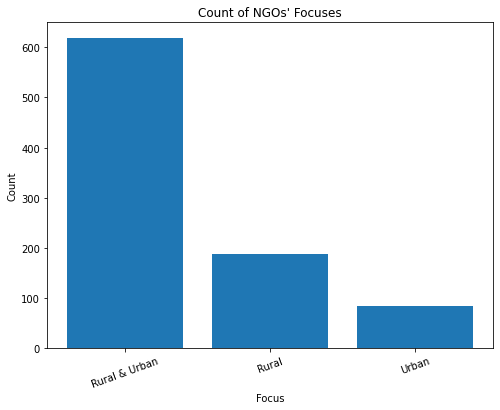

In [70]:
# Table of number of each class
table = column.value_counts().rename_axis('Focus').reset_index(name='Count')

# Plot number of each focus group
plt.figure(figsize = (8, 6))
plt.bar(table["Focus"], table["Count"])
plt.title("Count of NGOs' Focuses")
plt.xlabel("Focus")
plt.ylabel('Count')
plt.xticks(rotation = 20);
plt.show()

### Area of Operation: State
<a class="anchor" id="5.2.22"></a>
States that the NGO performs service in.

In [71]:
column = Darpan_Bihar_2["Area of Operation: State"]
column

0                       Gujarat
1                    Tamil Nadu
2                           NaN
3                        Odisha
4             Jammu and Kashmir
                 ...           
921       ChhattisgarhKarnataka
922                   All India
923                  Tamil Nadu
924                 Maharashtra
925    Andhra PradeshPuducherry
Name: Area of Operation: State, Length: 926, dtype: object

In [72]:
# Check number of unique values
print("No. of unique values:", len(column.unique()))

# Check for null values
print("Null:", sum(column.isnull()))
column.dropna(inplace = True)

# Check for duplicates
counter = dict(Counter(column))
duplicates = { key:value for key, value in counter.items() if value > 1}
print("Duplicates:", duplicates)
if len(duplicates) > 0:
    print("No. of duplicates:", len(duplicates))

No. of unique values: 140
Null: 150
Duplicates: {'Gujarat': 34, 'Tamil Nadu': 63, 'Odisha': 36, 'Haryana': 4, 'Madhya Pradesh': 10, 'Delhi': 31, 'Uttar Pradesh': 33, 'Uttarakhand': 5, 'Maharashtra': 118, 'West Bengal': 55, 'Tripura': 3, 'Jharkhand': 10, 'Bihar': 18, 'Rajasthan': 22, 'All India': 133, 'Karnataka': 38, 'BiharJharkhand': 2, 'Tamil NaduTamil Nadu': 2, 'Andhra Pradesh': 13, 'BiharUttar PradeshUttarakhand': 3, 'Chhattisgarh': 2, 'Andhra PradeshTelangana': 4, 'DelhiHaryanaUttar Pradesh': 2, 'DelhiHaryanaRajasthanUttar Pradesh': 2, 'Telangana': 3, 'Kerala': 4, 'HaryanaUttar Pradesh': 2, 'Madhya PradeshMaharashtra': 2, 'DelhiHaryana': 5, 'Goa': 2, 'PuducherryTamil Nadu': 2, 'DelhiMaharashtra': 2, 'Puducherry': 2, 'GujaratMaharashtra': 2, 'MaharashtraMaharashtra': 2, 'MaharashtraRajasthan': 2}
No. of duplicates: 36


### PAN
<a class="anchor" id="5.2.23"></a>
Permanent Account Number. 10-digit alphanumeric number that is assigned to each NGO.

In [73]:
column = Darpan_Bihar_2["PAN"]
column

0      AACTS0036Q
1      AACTD2691L
2      AAETS2349N
3      AACTV0963D
4      AAACZ5957C
          ...    
921    AABCC6926B
922    AAABM0639H
923    AABTM6702C
924    AAATC1150F
925    AAATU3766H
Name: PAN, Length: 926, dtype: object

In [74]:
# Check if all rows have 10 digits
PAN_length = [len(PAN) for PAN in column]
print("Rows without 10 digits:", sum([length != 10 for length in PAN_length]))

# Check number of unique values
print("No. of unique values:", len(column.unique()))

# Check for null values
print("Null:", sum(column.isnull()))
column.dropna(inplace = True)

# Check for duplicates
counter = dict(Counter(column))
duplicates = { key:value for key, value in counter.items() if value > 1}
print("Duplicates:", duplicates)
if len(duplicates) > 0:
    print("No. of duplicates:", len(duplicates))

Rows without 10 digits: 0
No. of unique values: 926
Null: 0
Duplicates: {}
